In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [18]:
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import Conv2D 
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils 

In [3]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [4]:
train = get_training_data('C:/Users/Administrateur/OneDrive/Formation DATASCIENCE/Projet DATA SCIENCE/chest_xray/train')
test = get_training_data('C:/Users/Administrateur/OneDrive/Formation DATASCIENCE/Projet DATA SCIENCE/chest_xray/test')
val = get_training_data('C:/Users/Administrateur/OneDrive/Formation DATASCIENCE/Projet DATA SCIENCE/chest_xray/val')

<ipython-input-3-b2613b36a4a4>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

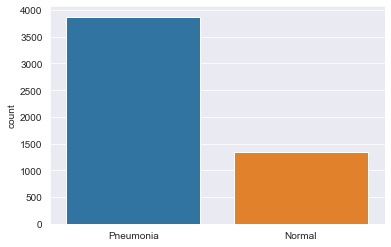

In [5]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)  

Text(0.5, 1.0, 'NORMAL')

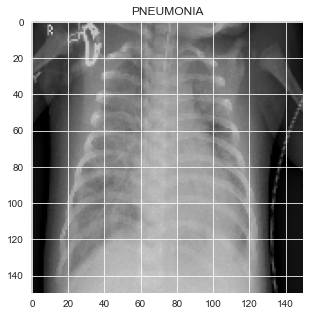

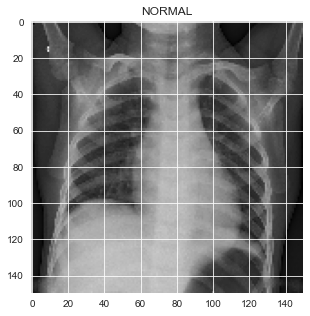

In [48]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [7]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [8]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [9]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [49]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout_7 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 38, 38, 64)       

In [50]:
model.compile(loss='categorical_crossentropy', # loss function
              optimizer='adam',                # optimization algorithm
              metrics=['accuracy'])            # evaluation metric

In [58]:
training_history = model.fit(x_train, y_train,
                             validation_split = 0.2,
                             epochs = 12,
                             batch_size = 32)


Epoch 1/12
131/131 [==============================] - 297s 2s/step - loss: 0.0000e+00 - accuracy: 0.9288 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/12
131/131 [==============================] - 241s 2s/step - loss: 0.0000e+00 - accuracy: 0.9288 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/12
131/131 [==============================] - 319s 2s/step - loss: 0.0000e+00 - accuracy: 0.9288 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/12
131/131 [==============================] - 318s 2s/step - loss: 0.0000e+00 - accuracy: 0.9288 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/12
131/131 [==============================] - 273s 2s/step - loss: 0.0000e+00 - accuracy: 0.9288 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/12
131/131 [==============================] - 268s 2s/step - loss: 0.0000e+00 - accuracy: 0.9288 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/12
131/131 [==============================] - 260s 2s/step - l

In [59]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 7s 350ms/step - loss: 0.0000e+00 - accuracy: 0.6250
Loss of the model is -  0.0
20/20 [==============================] - 7s 346ms/step - loss: 0.0000e+00 - accuracy: 0.6250
Accuracy of the model is -  62.5 %


In [60]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [55]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.00      0.00      0.00       390
   Normal (Class 1)       0.38      1.00      0.55       234

           accuracy                           0.38       624
          macro avg       0.19      0.50      0.27       624
       weighted avg       0.14      0.38      0.20       624



In [61]:
cm = confusion_matrix(y_test,predictions)
cm

array([[390,   0],
       [234,   0]], dtype=int64)

In [43]:
µ

<AxesSubplot:>

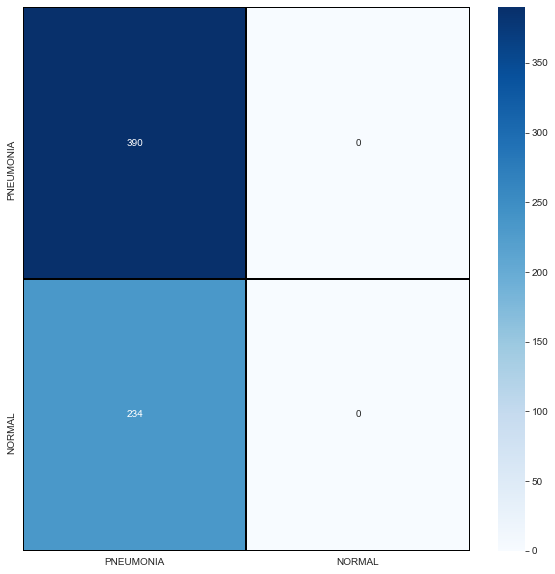

In [44]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)


In [45]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

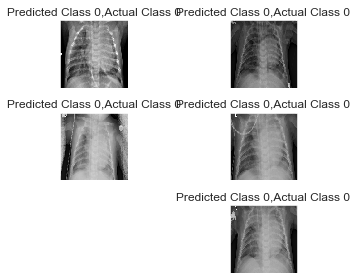

In [46]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

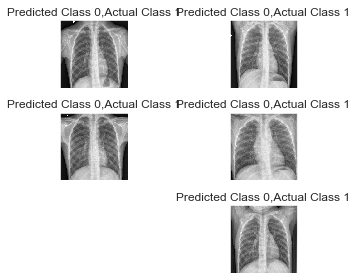

In [47]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

## from sklearn import metrics